# LOGISTIC REGRESSION

## Importing the Libraries

In [1]:
# Import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc,RocCurveDisplay,PrecisionRecallDisplay

In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import cross_validate

## Importing helper functions

In [24]:
# Import the helper functions
# Import the required functions from the helper function file
from helper_functions_ml import createMetricsDF,computeModelMetrics,computeAndPlotMetrics

## Import the Data (training and testing)

In [7]:
# Read the training data
df_train = pd.read_csv('df.csv')
print(df_train.head())

df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head(3)
print(df_train.shape)

   Unnamed: 0  TransactionID  isFraud  TransactionDT  TransactionAmt  \
0           0        2987000        0          86400        1.835691   
1           1        2987001        0          86401        1.462398   
2           2        2987002        0          86469        1.770852   
3           3        2987003        0          86499        1.698970   
4           4        2987004        0          86506        1.698970   

   ProductCD  card1  card2  card3  card4  ...  id_36  id_37  id_38  \
0          4  13926   -1.0  150.0      1  ...      2      2      2   
1          4   2755  404.0  150.0      2  ...      2      2      2   
2          4   4663  490.0  150.0      4  ...      2      2      2   
3          4  18132  567.0  150.0      2  ...      2      2      2   
4          1   4497  514.0  150.0      2  ...      0      1      1   

   DeviceType  DeviceInfo  P_emaildomain_addr1_card1  card1_card2  \
0           1        1735                      63363         3655   
1       

In [8]:
# CP cannot be used to copy file here because numFolds is a variable and hence the filenames will change based on the number of folds.
# instead of using linux CP command we use SHUTIL copy 

# read the K fold train and dev indices

numFolds = 3

import shutil # file copy package. 

srcFileName = 'Classification_Products\train_dev_indices_' + str(numFolds) + '.pickle' 
train_dev_indices_file = 'train_dev_indices_' + str(numFolds) + '.pickle'
# !cp  srcFileName destFileName
shutil.copyfile(srcFileName, train_dev_indices_file)



'train_dev_indices_3.pickle'

In [9]:
# read the train dev indices file
# train_dev_indices_df = pd.read_csv(train_dev_indices_file)
# train_dev_indices_df.head()

with open(train_dev_indices_file, 'rb') as handle:
    train_dev_indices = pickle.load(handle)
train_dev_indices

{'train': [array([195756, 195757, 195758, ..., 590537, 590538, 590539]),
  array([     0,      1,      2, ..., 590537, 590538, 590539]),
  array([     0,      1,      2, ..., 397410, 397417, 397418])],
 'dev': [array([     0,      1,      2, ..., 221151, 221172, 221182]),
  array([195756, 195757, 195758, ..., 397410, 397417, 397418]),
  array([393481, 393482, 393483, ..., 590537, 590538, 590539])]}

In [10]:
X = df_train.drop(columns = ['isFraud','TransactionID'])
y = df_train['isFraud']

In [11]:
# List of categorical and numerical columns in merged dataset

## Numerical columns

num_column_lst_final = []
for icol in X.columns:
  if X[icol].dtypes in ['float64', 'int64']:
    num_column_lst_final.append(icol)
print(f"The columns that have numerical features are: '{num_column_lst_final}'")
print(f"The number of columns that have numerical features are: '{len(num_column_lst_final)}'")

print('\n')

## Categorical Columns
cat_column_lst_final = []
for icol in X.columns:
  if X[icol].dtypes in ['object']:
    cat_column_lst_final.append(icol)
print(f"The columns that have categorical features are: '{cat_column_lst_final}'")
print(f"The number of columns that have categorical features are: '{len(cat_column_lst_final)}'")


The columns that have numerical features are: '['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'D1', 'D3', 'D4', 'D8', 'D9', 'D10', 'D13', 'D14', 'M1', 'M2', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V4', 'V6', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23', 'V25', 'V27', 'V35', 'V37', 'V39', 'V44', 'V46', 'V53', 'V55', 'V61', 'V66', 'V75', 'V77', 'V82', 'V86', 'V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V117', 'V118', 'V120', 'V121', 'V123', 'V124', 'V129', 'V135', 'V138', 'V139', 'V141', 'V144', 'V148', 'V161', 'V169', 'V170', 'V172', 'V173', 'V174', 'V184', 'V194', 'V208', 'V209', 'V214', 'V220', 'V221', 'V223', 'V224', 'V226', 'V227', 'V228', 'V238', 'V240', 'V241', 'V250', 'V260', 'V270', 'V281', 'V282', 'V284', 'V286', 'V288', 'V290', 'V300', 'V305', 'V313', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',

## Logistic Regression model(s)

### Basic Logistic Regression model

In [33]:
# loop through each fold, retrieve the train and dev ids for each fold before running the basic logisitic regression model on each fold
y_pred_train = {}
y_pred_dev = {}

y_pred_train_prob = {}
y_pred_dev_prob = {}

y_train_folds = {}
y_dev_folds ={}

for i_fold in range(0,numFolds):
  train_ids = train_dev_indices['train'][i_fold]
  dev_ids  = train_dev_indices['dev'][i_fold]
  
  X_train = X.loc[train_ids,:]
  X_dev = X.loc[dev_ids,:]
  
  y_train = y[train_ids]
  y_dev = y[dev_ids]

  y_train_folds[i_fold] = y_train
  y_dev_folds[i_fold] = y_dev

  preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), num_column_lst_final)],
                      remainder='passthrough'
                      )
  pipe = Pipeline([('preprocessor', preprocessor), ('lgr', LogisticRegression())])
  pipe.fit(X_train,y_train)

  y_pred_train[i_fold] = pipe.predict(X_train)
  y_pred_dev[i_fold] = pipe.predict(X_dev)

  y_pred_train_prob[i_fold] = pipe.predict_proba(X_train)[:,1]
  y_pred_dev_prob[i_fold] = pipe.predict_proba(X_dev)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### Basic Logistic Regression Class Balanced

In [34]:
# loop through each fold, retrieve the train and dev ids for each fold before running the basic logisitic regression model on each fold
y_pred_balanced_train = {}
y_pred_balanced_dev = {}

y_pred_balanced_train_prob = {}
y_pred_balanced_dev_prob = {}

y_train_balanced_folds = {}
y_dev_balanced_folds ={}

for i_fold in range(0,numFolds):
  train_ids = train_dev_indices['train'][i_fold]
  dev_ids  = train_dev_indices['dev'][i_fold]
  
  X_train = X.loc[train_ids,:]
  X_dev = X.loc[dev_ids,:]
  
  y_train = y[train_ids]
  y_dev = y[dev_ids]

  y_train_folds[i_fold] = y_train
  y_dev_folds[i_fold] = y_dev

  preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), num_column_lst_final)],
                      remainder='passthrough'
                      )
  pipe = Pipeline([('preprocessor', preprocessor), ('lgr', LogisticRegression(class_weight='balanced'))])
  pipe.fit(X_train,y_train)

  y_pred_balanced_train[i_fold] = pipe.predict(X_train)
  y_pred_balanced_dev[i_fold] = pipe.predict(X_dev)

  y_pred_balanced_train_prob[i_fold] = pipe.predict_proba(X_train)[:,1]
  y_pred_balanced_dev_prob[i_fold] = pipe.predict_proba(X_dev)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### Hyper-Parameter Tuning

For hyper parameter tuning, when using GridSearchCV, with the CV parameter, we can do a K fold stratified K fold cross validation for hyper parameter tuning. We need not use the train_dev_indices_3.pickle file here.

In [14]:
preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), num_column_lst_final)],
                      remainder='passthrough'
                      )
pipe = Pipeline([('preprocessor', preprocessor), ('lgr', LogisticRegression(class_weight='balanced'))])

In [15]:
# tune the regularization parameter C
# tune the maximum iterations for the lbfgs solver
# tune for all three penalty types
param_dict = {'lgr__C':[.001,0.1, 1.0, 10.0, 100.0, 1000.0],'lgr__max_iter':[100,500],'lgr__penalty':['l2','l1','elasticnet']}
grid = GridSearchCV(pipe, param_grid=param_dict,cv=3) 

In [16]:
# hyperparameter tuning
grid.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['TransactionDT',
                                                                          'TransactionAmt',
                                                                          'ProductCD',
                                                                          'card1',
                                                                          'card2',
                                                                          'card3',
                                                                          'card4',
                                                                  

In [17]:
grid.best_params_

{'lgr__C': 0.001, 'lgr__max_iter': 500, 'lgr__penalty': 'l2'}

### Chained Classifier Logistic Regression

In [18]:
scaler = StandardScaler()
X_scaled = X
X_scaled[num_column_lst_final] = scaler.fit_transform(X_scaled[num_column_lst_final])

In [19]:
# loop through each fold, retrieve the train and dev ids for each fold before running the basic logisitic regression model on each fold
y_pred_chain_train = {}
y_pred_chain_dev = {}

y_pred_chain_train_prob = {}
y_pred_chain_dev_prob = {}

y_train_folds = {}
y_dev_folds ={}

for i_fold in range(0,numFolds):
  train_ids = train_dev_indices['train'][i_fold]
  dev_ids  = train_dev_indices['dev'][i_fold]
  
  X_train = X_scaled.loc[train_ids,:]
  X_dev = X_scaled.loc[dev_ids,:]
  
  y_train = y[train_ids]
  y_dev = y[dev_ids]

  y_train = y_train.values.reshape(-1,1)

  y_train_folds[i_fold] = y_train
  y_dev_folds[i_fold] = y_dev

  lgr = LogisticRegression(C= 0.001, max_iter= 500, penalty = 'l2',class_weight='balanced') # include class_weight='balanced'

  chains = [ClassifierChain(lgr, order="random", random_state=i) for i in range(3)]
  for chain in chains:
    chain.fit(X_train, y_train)

  Y_pred_train_chains = np.array([chain.predict(X_train) for chain in chains])
  Y_pred_dev_chains = np.array([chain.predict(X_dev) for chain in chains])

  Y_pred_proba_train_chains = np.array([chain.predict_proba(X_train) for chain in chains])
  Y_pred_proba_dev_chains = np.array([chain.predict_proba(X_dev) for chain in chains])  

  y_pred_chain_train[i_fold] = Y_pred_train_chains.mean(axis=0)
  y_pred_chain_dev[i_fold] = Y_pred_dev_chains.mean(axis=0)

  y_pred_chain_train_prob[i_fold] = Y_pred_proba_train_chains.mean(axis=0)
  y_pred_chain_dev_prob[i_fold] = Y_pred_proba_dev_chains.mean(axis=0)

### Adaboost with Logistic Regression

In [20]:
# loop through each fold, retrieve the train and dev ids for each fold before running the basic logisitic regression model on each fold
y_pred_adaLGR_train = {}
y_pred_adaLGR_dev = {}

y_pred_adaLGR_train_prob = {}
y_pred_adaLGR_dev_prob = {}

y_train_folds = {}
y_dev_folds ={}

for i_fold in range(0,numFolds):
  train_ids = train_dev_indices['train'][i_fold]
  dev_ids  = train_dev_indices['dev'][i_fold]
  
  X_train = X.loc[train_ids,:]
  X_dev = X.loc[dev_ids,:]
  
  y_train = y[train_ids]
  y_dev = y[dev_ids]

  y_train_folds[i_fold] = y_train
  y_dev_folds[i_fold] = y_dev

  preprocessor = ColumnTransformer(
        transformers=[('scaler', StandardScaler(), num_column_lst_final)],
                      remainder='passthrough'
                      )
  pipe = Pipeline([('preprocessor', preprocessor),                 
                   ('AdaBoostClassifier',
                    AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=LogisticRegression(C= 0.001, max_iter= 500, penalty = 'l2',class_weight='balanced'), #class_weight='balanced'
                                    learning_rate=0.5, n_estimators=50,
                                    random_state=None))])
  pipe.fit(X_train,y_train)

  y_pred_adaLGR_train[i_fold] = pipe.predict(X_train)
  y_pred_adaLGR_dev[i_fold] = pipe.predict(X_dev)

  y_pred_adaLGR_train_prob[i_fold] = pipe.predict_proba(X_train)[:,1]
  y_pred_adaLGR_dev_prob[i_fold] = pipe.predict_proba(X_dev)[:,1]

## Evaluation of the model(s)


### Basic Logistic regression model

In [21]:
thresholds = np.arange(0, 1, .05) 

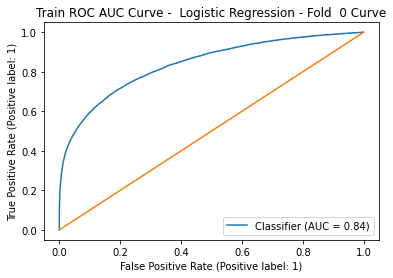

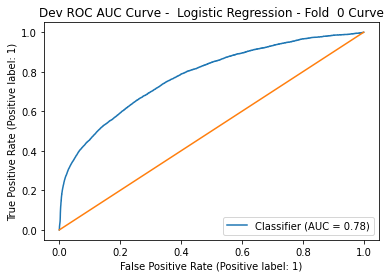

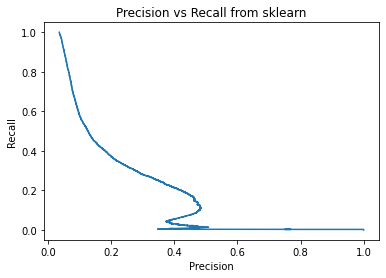

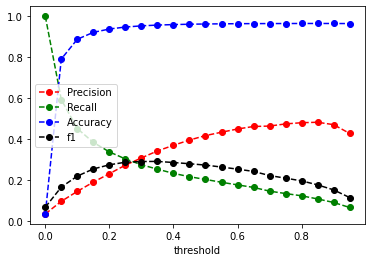

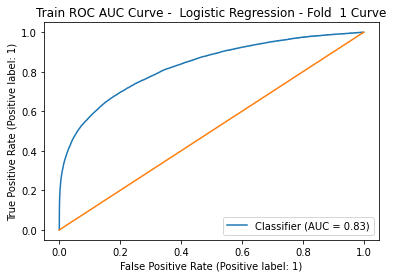

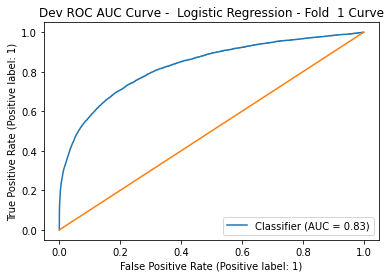

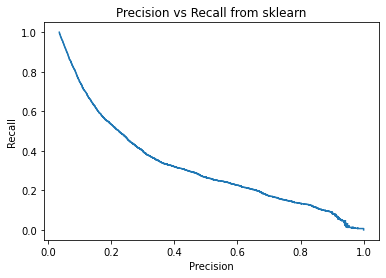

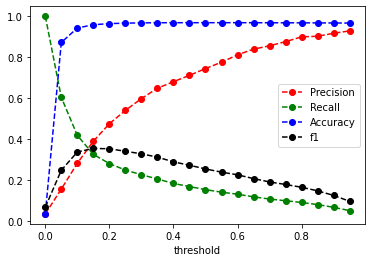

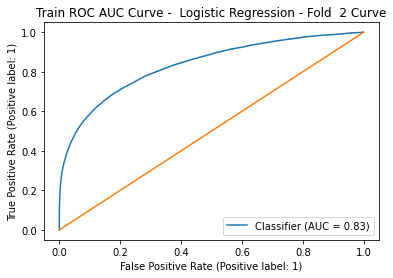

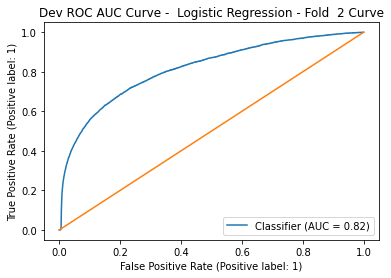

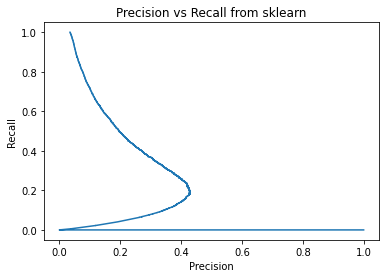

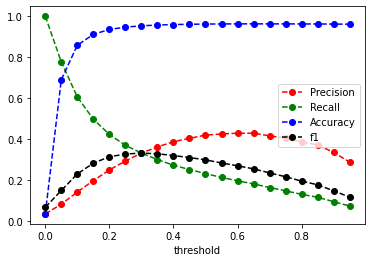

In [35]:
# Generate the model metrics for each of the three folds
LR_metrics_DF = []
for i_fold in range(0,numFolds): 
  LR_metrics_DF.append(computeAndPlotMetrics(y_pred_train[i_fold],y_pred_train_prob[i_fold],
                              y_pred_dev[i_fold],y_pred_dev_prob[i_fold],
                                  y_dev_folds[i_fold],y_train_folds[i_fold],thresholds,
                                  'Logistic Regression - Fold  ' + str(i_fold) ))

### Basic Logistic Regression Class Balanced

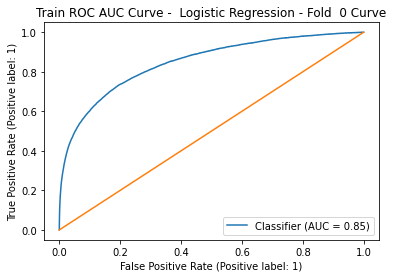

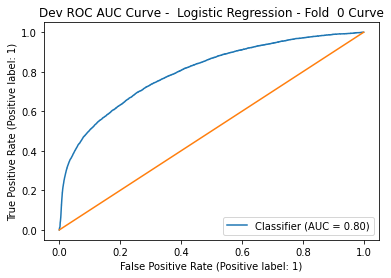

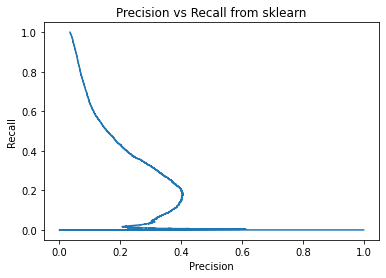

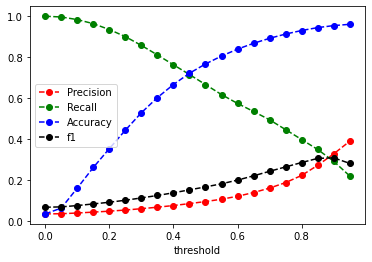

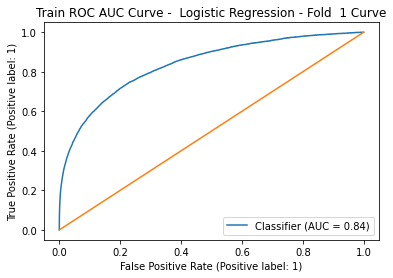

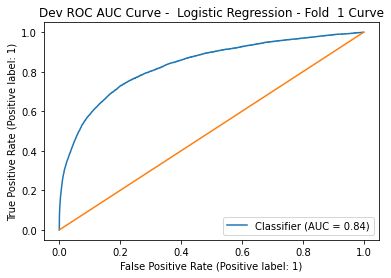

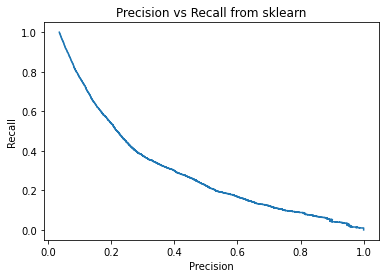

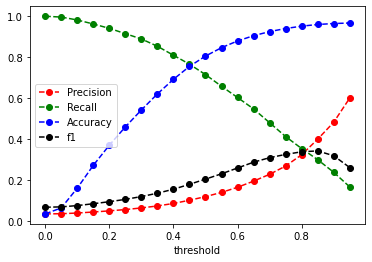

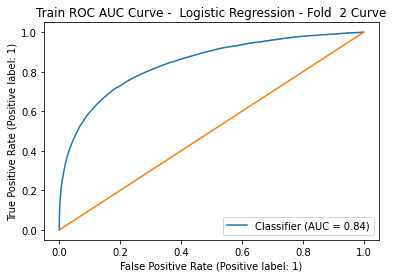

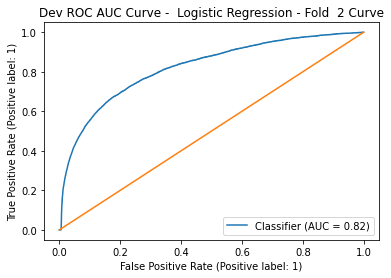

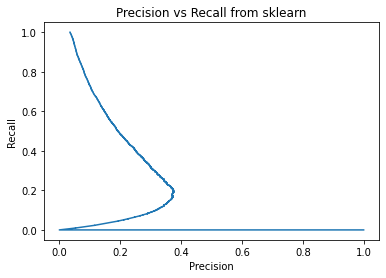

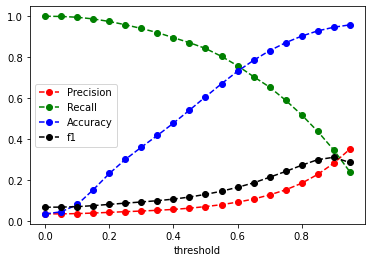

In [36]:
# Generate the model metrics for each of the three folds
LR_metrics_balanced_DF = []
for i_fold in range(0,numFolds): 
  LR_metrics_balanced_DF.append(computeAndPlotMetrics(y_pred_balanced_train[i_fold],y_pred_balanced_train_prob[i_fold],
                              y_pred_balanced_dev[i_fold],y_pred_balanced_dev_prob[i_fold],
                                  y_dev_folds[i_fold],y_train_folds[i_fold],thresholds,
                                  'Logistic Regression - Fold  ' + str(i_fold) ))

### Hyperparameter tuned model

In [27]:
y_pred_train = {}
y_pred_dev = {}

y_pred_train_prob = {}
y_pred_dev_prob = {}

y_train_folds = {}
y_dev_folds ={}

for i_fold in range(0,numFolds):
  train_ids = train_dev_indices['train'][i_fold]
  dev_ids  = train_dev_indices['dev'][i_fold]
  
  X_train = X.loc[train_ids,:]
  X_dev = X.loc[dev_ids,:]
  
  y_train = y[train_ids]
  y_dev = y[dev_ids]

  y_train_folds[i_fold] = y_train
  y_dev_folds[i_fold] = y_dev

  y_pred_train[i_fold] = grid.predict(X_train)
  y_pred_dev[i_fold] = grid.predict(X_dev)

  y_pred_train_prob[i_fold] = grid.predict_proba(X_train)[:,1]
  y_pred_dev_prob[i_fold] = grid.predict_proba(X_dev)[:,1]  

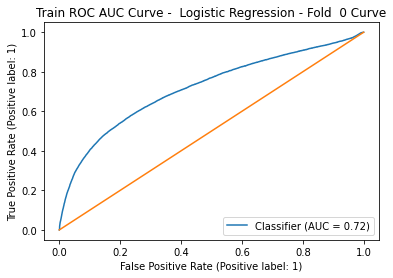

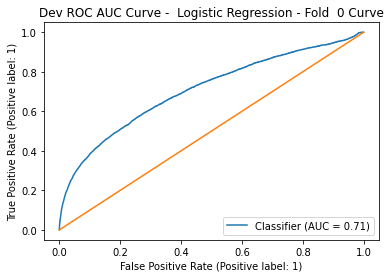

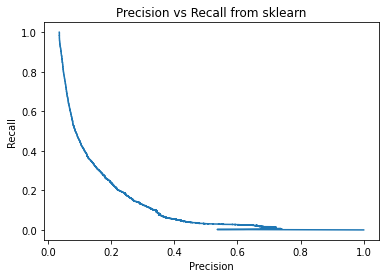

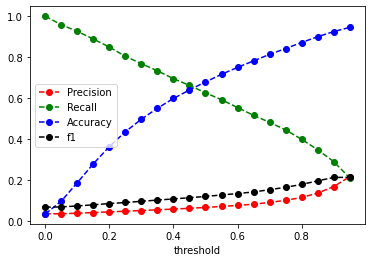

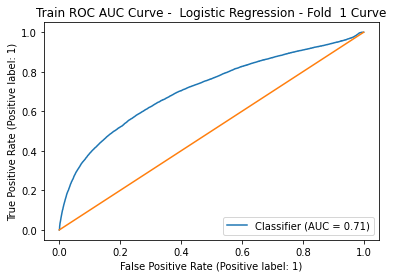

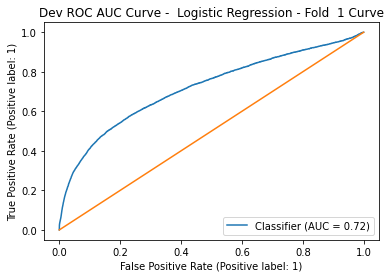

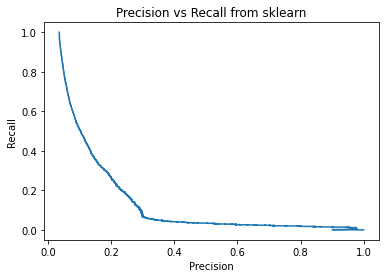

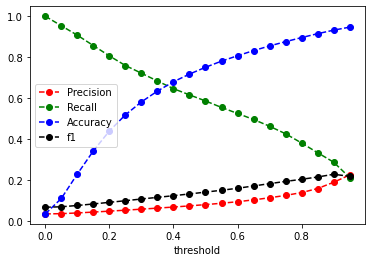

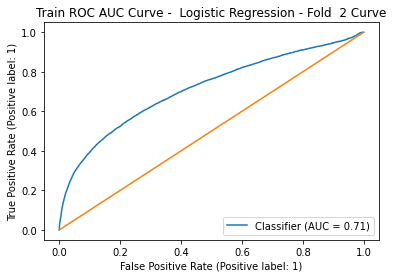

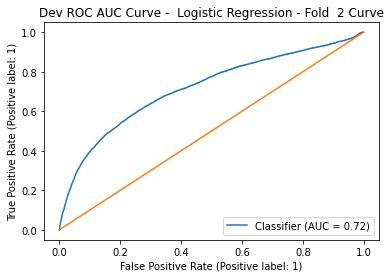

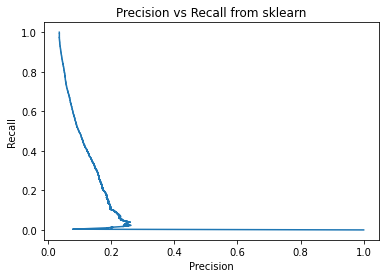

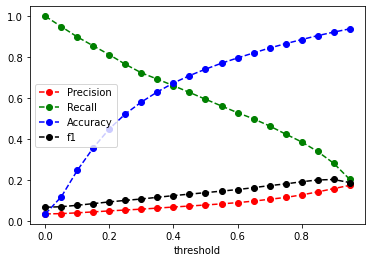

In [28]:
LR_metrics_DF_grid = []
for i_fold in range(0,numFolds): 
  LR_metrics_DF_grid.append(computeAndPlotMetrics(y_pred_train[i_fold],y_pred_train_prob[i_fold],
                              y_pred_dev[i_fold],y_pred_dev_prob[i_fold],
                                  y_dev_folds[i_fold],y_train_folds[i_fold],thresholds,
                                  'Logistic Regression - Fold  ' + str(i_fold) ))

### Chained Logistic Regression Model

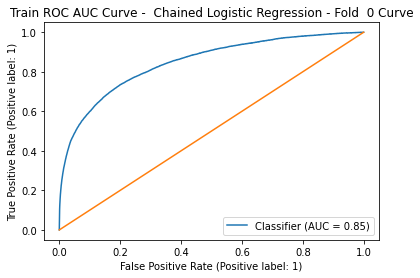

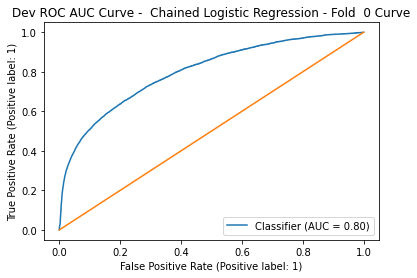

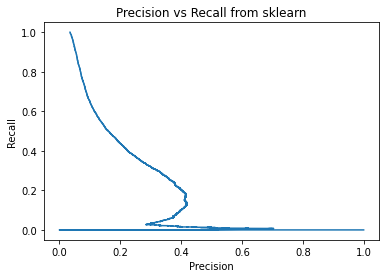

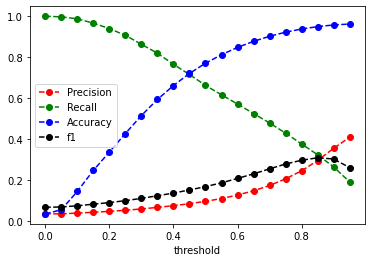

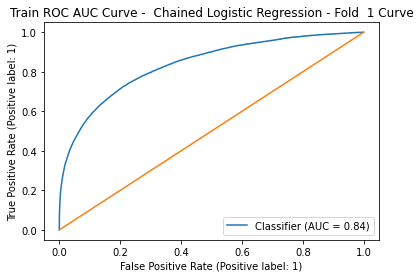

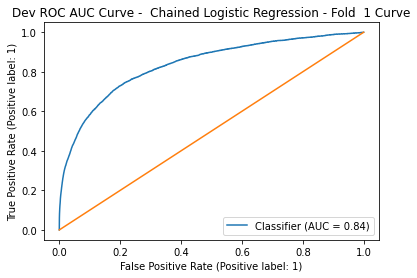

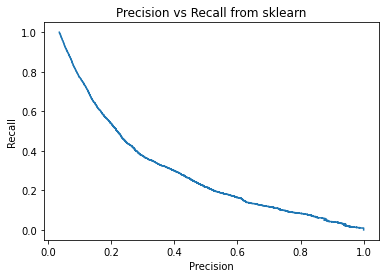

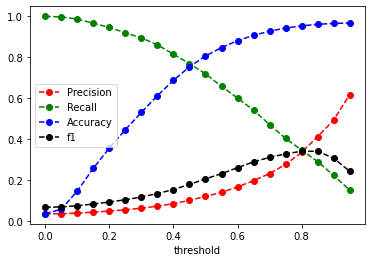

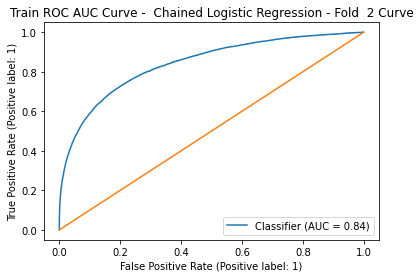

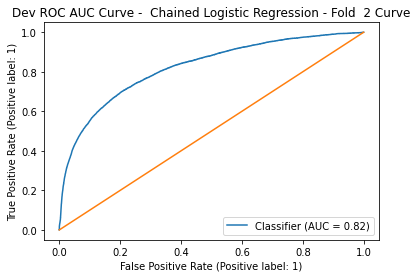

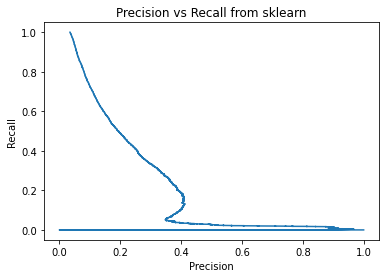

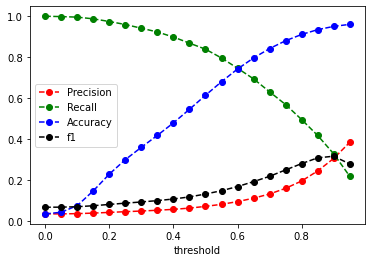

In [29]:
# Generate the model metrics for each of the three folds
LR_chain_metrics_DF = []
for i_fold in range(0,numFolds): 
  LR_chain_metrics_DF.append(computeAndPlotMetrics(y_pred_chain_train[i_fold],y_pred_chain_train_prob[i_fold],
                              y_pred_chain_dev[i_fold],y_pred_chain_dev_prob[i_fold],
                                  y_dev_folds[i_fold],y_train_folds[i_fold],thresholds,
                                  'Chained Logistic Regression - Fold  ' + str(i_fold) ))

### Adaboost with Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

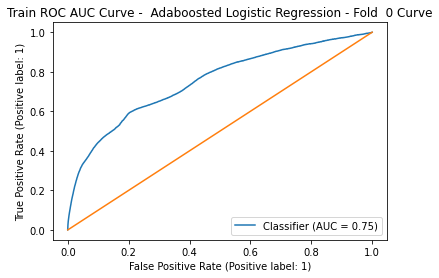

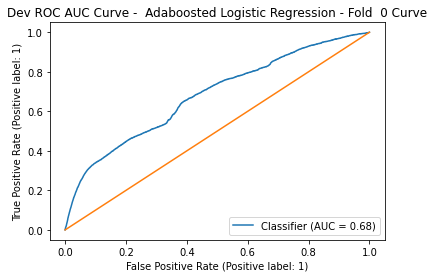

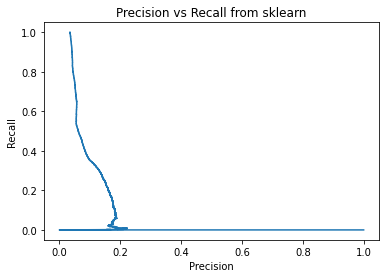

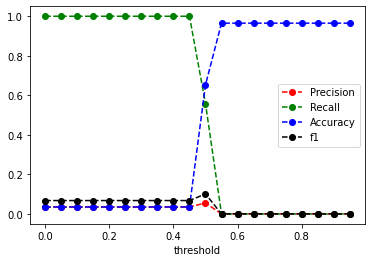

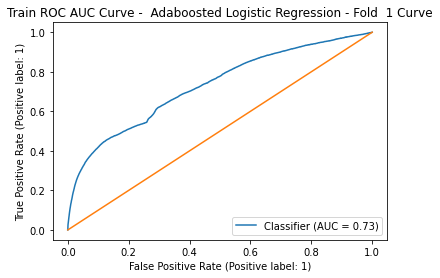

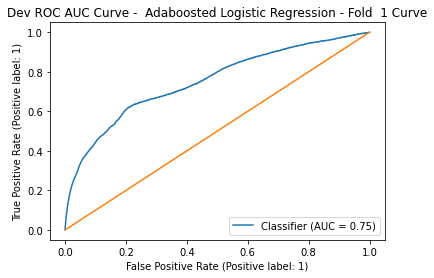

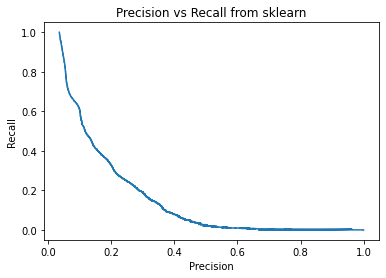

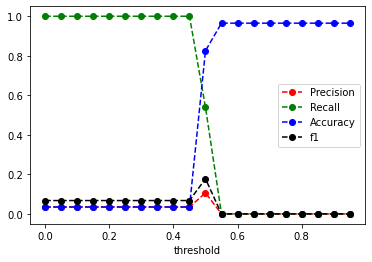

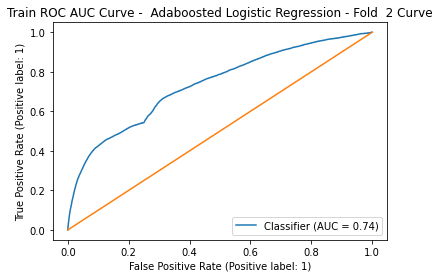

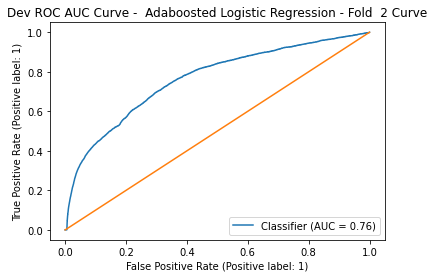

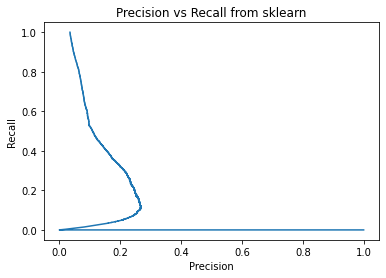

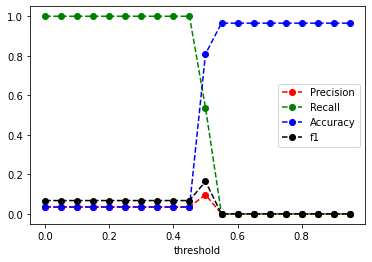

In [30]:
# Generate the model metrics for each of the three folds
LR_ada_metrics_DF = []
for i_fold in range(0,numFolds): 
  LR_ada_metrics_DF.append(computeAndPlotMetrics(y_pred_adaLGR_train[i_fold],y_pred_adaLGR_train_prob[i_fold],
                              y_pred_adaLGR_dev[i_fold],y_pred_adaLGR_dev_prob[i_fold],
                                  y_dev_folds[i_fold],y_train_folds[i_fold],thresholds,
                                  'Adaboosted Logistic Regression - Fold  ' + str(i_fold) ))

# Summary

In [37]:
LR_metrics_DF

[  Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.969624  0.299291   0.775820  0.185408        0.83856
 1  development  0.962194  0.273384   0.417412  0.203252        0.77802,
   Dataset Type  accuracy  f1 score  precision  recall  roc auc score
 0     training  0.969631  0.287485   0.802662  0.1751       0.828702
 1  development  0.968539  0.254664   0.744546  0.1536       0.830400,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.969428  0.285613   0.783203  0.174652       0.833452
 1  development  0.961909  0.298859   0.419753  0.232031       0.815269]

In [38]:
LR_metrics_balanced_DF

[  Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.802364  0.205911   0.119797  0.732341       0.847254
 1  development  0.767017  0.166812   0.095336  0.666521       0.798796,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.787045  0.192668   0.111067  0.726243       0.837741
 1  development  0.805585  0.204730   0.119465  0.715157       0.835531,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.792524  0.198394   0.114705  0.733740       0.843142
 1  development  0.606520  0.130335   0.070629  0.842747       0.821056]

In [39]:
LR_metrics_DF_grid

[  Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.746208  0.140064   0.079451  0.590708       0.717432
 1  development  0.679248  0.120222   0.066493  0.626307       0.708203,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.710444  0.128591   0.071862  0.610599       0.712312
 1  development  0.750776  0.141410   0.080396  0.586527       0.718088,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.715012  0.129614   0.072561  0.606417       0.713093
 1  development  0.741641  0.138761   0.078541  0.594889       0.716628]

In [40]:
LR_chain_metrics_DF

[  Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.800918  0.204254   0.118732  0.730236       0.846123
 1  development  0.770568  0.168100   0.096264  0.662456       0.799662,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.787804  0.192991   0.111307  0.725154       0.837023
 1  development  0.806149  0.206063   0.120267  0.718931       0.836153,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.791447  0.197290   0.113998  0.732433       0.841035
 1  development  0.614120  0.132066   0.071673  0.839117       0.821691]

In [41]:
LR_ada_metrics_DF

[  Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.816766  0.170885   0.101514  0.539673       0.750478
 1  development  0.652893  0.101185   0.055634  0.558362       0.680256,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.732904  0.125640   0.070946  0.548457       0.727885
 1  development  0.825545  0.177914   0.106521  0.539489       0.751087,
   Dataset Type  accuracy  f1 score  precision    recall  roc auc score
 0     training  0.740849  0.129144   0.073177  0.549143       0.735236
 1  development  0.809049  0.164451   0.097089  0.537099       0.762346]

In this analysis, we employed Logistic Regression (LR) to develop a machine learning model for classifying transactions as fraudulent or non-fraudulent. Despite LR being a simple yet powerful technique for binary classification, we encountered challenges due to the heavily imbalanced nature of the data.

Initially, even the base LR model, without considering class weights, demonstrated a relatively high accuracy score of approximately 0.968. However, this accuracy improvement over the baseline model (0.965) was marginal, and the model exhibited an exceptionally low recall score ranging from 0.15 to 0.23.

To address the dataset's inherent imbalance, we experimented with balancing the class weights, resulting in a more reliable model. This balanced model achieved a high ROC-AUC score of around 0.83, comparable to the base LR model's score of approximately 0.81. More significantly, it achieved a markedly higher recall score, ranging from 0.67 to 0.84.

Despite the improved recall, the balanced model's accuracy score dropped to approximately 0.60 to 0.81, indicating a higher rate of misclassification, particularly for non-fraudulent transactions. This discrepancy is further evident in the low precision score, indicating that the model incorrectly labels many legitimate transactions as fraudulent.

To mitigate this bias and enhance the model's performance, methods aimed at boosting the model could significantly improve its predictive capabilities, especially in correctly identifying non-fraudulent transactions.

In [ ]:
filename = 'model_metrics_nohyperparamtune.csv'
pd.concat(LR_metrics_DF).to_csv(filename)

In [ ]:
filename = 'model_metrics_hyperparamtune.csv'
pd.concat(LR_metrics_DF_grid).to_csv(filename)